<a href="https://colab.research.google.com/github/RubingLi123/foster_2023spring/blob/2023sp-master/Homeworks/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#If opening in colab run this cell
!git clone https://github.com/CTVisMe/DS4B_Sp24.git
%cd DS4B_Sp24/Homeworks/

Cloning into 'DS4B_Sp24'...
remote: Enumerating objects: 837, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 837 (delta 113), reused 235 (delta 110), pack-reused 598
Receiving objects: 100% (837/837), 158.22 MiB | 14.72 MiB/s, done.
Resolving deltas: 100% (376/376), done.
Updating files: 100% (146/146), done.
/content/DS4B_Sp24/Homeworks


## # IF OPENING IN COLAB, REMEMBER TO SAVE THIS NOTEBOOK TO YOUR GOOGLE DRIVE!

# HW2: Predicting Patient Show-Up

The purpose of this part of the homework is to get you up to speed with data manipulation and model fitting using Python. These are the skills you will need to have for your term project.

### Background

You've been hired as the manager of Sacred Heart Medical Clinic (SHMC). As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the data containing past appointments (Remember to change this to the specific path of your data).
data_path = "./data/data-hw2.csv"

### Loading the data

**1. Load the data referenced by the path above into a pandas data frame. Print the total number of rows and columns, and show the first few rows in the dataset.**

In [ ]:
df_orig = pd.read_csv(data_path)
df=df_orig
print(f'There are {df.shape[0]:,} rows and {df.shape[1]} columns in this dataset')
df.head()

There are 110,527 rows and 14 columns in this dataset


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here's a brief summary of the variables you should see:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female.
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor.
7. Age = How old is the patient.
8. Neighborhood - Place where the patient lives.
9. Scholarship - Whether the patient receives financial help.
10. Hypertension - Whether the patient suffers from hypertension.
11. Diabetes - Whether the patient suffers from diabetes.
12. Alcoholism - Whether the patient suffers from alcoholism.
13. Handicap - Whether the patient is handicapped.
14. SMS_received - Whether 1 or more SMS messages were sent to the patient
15. No-show - Whether the patient missed the appointment.

**2. Check out if there are any Na or NaN values. If there are any, drop all the observations that include such values in any of the columns.** (This is not necessarily what you should do in your projects)

In [ ]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
df = df.dropna()


### Dealing with dates

**3. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this).**

In [ ]:
# Put your answer here
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

**4. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, apply "normalize" to ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method.**

In [ ]:
df['ScheduledDay'] = df['ScheduledDay'].dt.normalize()

**5. Create a new column called 'TimeInAdvance' for the difference in days between ScheduledDay and AppointmentDay. Make sure that the new field is numeric - and not of form "TimeDelta", which is the difference between two datetimes. (you can apply `dt.days`  to a datetime object to accomplish this).**

In [ ]:
df['TimeAdvanced'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['TimeAdvanced'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: TimeAdvanced, dtype: float64

There are many other features you may want to extract from date variables, such as the time at which the appointment was scheduled, the day of the week, the month, etc. However, we will only use TimeInAdvance for the purposes of this homework.

### Cleaning data

**6. Use the "describe" command from pandas to obtain some general stats about the data. Comment on any weird values you see in any of the columns? Remove all observations that include "weird" or otherwise questionable values and comment on why did you remove such observations. Also, print the number of observations you removed.**

In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeAdvanced
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


**strange things I found**
Examing the range of values in each feature, the following issues were found:

[you did not have to do exactly as i did ]

* Age: Ages less than 0 and greater than than 100 seems
suspecious. A negative age is impossible while age over 100 is extremely rare.
  * Since age over 100 are also very rare in the dataset, I only removed records with age < 0
* Handicap: Values that are not 0 or 1 seems suspecious. Only 0 and 1 are valid entries for this feature.
  *Removed records with invalid 'Handicap' entry
* TimeAdvaced: Negative values seems suspecious. It doesn't make sense that the appointment is made after the actual visit. The longest period in the data is about 6 month which seems reasable at times.
  * Removed records that have negative TimeAdvanced.

In [ ]:
c1 = df['Age'] >= 0
c2 = df['Handicap'].isin([0,1])
c3 = df['TimeAdvanced'] >= 0

ini_count = df.shape[0]
df = df[c1 & c2 & c3]
removed = ini_count - df.shape[0]
print(f'{removed} records removed')


205 records removed


### Dealing with binary variables

**7. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Hint: Take a look at the [where](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.where.html) method. Make sure to also drop the Gender column.**

In [ ]:
df['IsFemale'] = np.where(df['Gender'] == 'F', 1, 0)
df = df.drop(columns = ['Gender'])

<ipython-input-11-db55e7000e4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsFemale'] = np.where(df['Gender'] == 'F', 1, 0)


**8. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise.**

In [ ]:
df['No-show'] = np.where(df['No-show'] == 'Yes', 1, 0)

### Dealing with categorical variables

**9. Let's take a look at the Neighbordhood column. How many unique neighborhoods are there? Which are the 5 most common neighborhoods? Which are the 5 least common ones?**

In [ ]:
df['Neighborhood'].value_counts().head(5)


JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4419
JARDIM DA PENHA    3872
ITARARÉ            3507
Name: Neighborhood, dtype: int64

In [ ]:
df['Neighborhood'].value_counts().tail(5)

ILHA DO BOI                    35
ILHA DO FRADE                  10
AEROPORTO                       8
ILHAS OCEÂNICAS DE TRINDADE     2
PARQUE INDUSTRIAL               1
Name: Neighborhood, dtype: int64

**10. We often group together categories that are very rare because it's hard to generalize from them. Use .value_counts to find the total in each neighborhood.  Then, for the neighborhoods that appear less than 2000 times in the dataset replace their name with "OTHER". (Code provided below:)**

In [ ]:
# Put your (optional) answer here
counts = df['Neighborhood'].value_counts()
minor = counts[counts < 2000].index.tolist()
df.loc[df['Neighborhood'].isin(minor), 'Neighborhood'] = 'OTHER'
df.Neighborhood.value_counts()

OTHER                43792
JARDIM CAMBURI        7717
MARIA ORTIZ           5805
RESISTÊNCIA           4419
JARDIM DA PENHA       3872
ITARARÉ               3507
CENTRO                3330
TABUAZEIRO            3126
SANTA MARTHA          3113
JESUS DE NAZARETH     2853
BONFIM                2770
SANTO ANTÔNIO         2742
CARATOÍRA             2564
SANTO ANDRÉ           2562
JABOUR                2509
SÃO PEDRO             2433
NOVA PALESTINA        2261
ILHA DO PRÍNCIPE      2259
ANDORINHAS            2255
DA PENHA              2210
ROMÃO                 2205
GURIGICA              2018
Name: Neighborhood, dtype: int64

**11. Get dummy/indicator variables for each neighborhood and add them to the dataframe. Hint: Take a look at the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method (note - in class we discussed the need to create k-1 dummies if there are k categories when doing regression.  We do NOT have to do this with trees.  Tree models do not require creation of a baseline dummy variable - so you can use drop_first=False with `get_dummies`, which is the default.). Make sure to add the dummies to your data frame, and also drop the Neighborhood column once the dummies are created.**

In [ ]:
# Put your answer here
dummies = pd.get_dummies(df['Neighborhood'])
df = df.drop(columns =['Neighborhood'])
df = pd.concat([df, dummies], axis=1)

### Dealing with panel data


There are many patients that have made more than one appointment. Panel data (also called longitudinal data) contain observations for the same individuals over multiple periods of time. In our particuclar case, such data may help us to make better predictions.

For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. We want to create a variable that calculates the number of no_shows BEFORE the current appointment..this is advanced so we give you the code to create this attribute.

**12. Create a new column called "PreviousNoShows" that for each appointment includes the number of past appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). (Code provided: Sort the dataframe by PatientID and ScheduledDay. Then, group by PatientID and compute the cumulative sum of the No-show variable)**

In [ ]:
## sample code - make sure to replace "df" with your data frame name
df = df.sort_values(['PatientId', 'ScheduledDay'])
df['PreviousNoShows'] = df.groupby(['PatientId'])['No-show'].cumsum()

There are many other features we could compute with this data set, such as time between appointments, number of past appointments, fraction of appointments to which the patient did not show up, etc. However, for the purposes of this homework, we will only work with PreviousNoShows.

### Removing the unnecessary

**13. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay.**

In [ ]:
df = df.drop(columns =['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'])

### Predictive modeling

**14. Let's build a model to predict No-Show using a DecisionTreeClassifier. First, split the data into training and test (80/20) - using `random_state=123`.  Using max_depth=3, fit the DecisionTreeClassifier to the training set, and report the accuracy on the training set and the test set.**


In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

y = df['No-show']
X = df.drop(columns = ['No-show'])

dt = DecisionTreeClassifier(criterion="entropy")
(X_train,  X_test, y_train, y_test) = train_test_split(X,y,  test_size=.2,random_state=123)


dt.fit(X,y)
accuracy = dt.score(X,y)

print(f'The training accuracy is {accuracy:.3}')

y_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_pred, y_test).round(4)


# Put your answer here

The training accuracy is 0.979


**15. Now lets do 5-fold cross validation by calling cross_val_score with the FULL X and y data (the function does the splitting and fitting for us). Use the option `scoring="accuracy"`.  Find the mean accuracy of the 5 numbers returned.**

In [ ]:
scores = cross_val_score(dt, X, y, scoring="accuracy", cv=5)

print(f'The cross-validation accuracies are {np.round(scores,3)} with a mean of {scores.mean():.3}')

The cross-validation accuracies are [0.891 0.895 0.889 0.892 0.898] with a mean of 0.893


**16. Lets see what is the optimal depth for this tree. Create a for-loop that cycles over all max_depth values between 2 and 15 and prints out the mean cross-validated test accuracy for each value of max_depth.  Which value of max_depth has the highest cross-validated accuracy?**

In [ ]:

depths=list(range(2,15))

lenvec = len(depths)
train_acc = np.empty(lenvec)
test_acc = np.empty(lenvec)
cv_acc= np.empty(lenvec)

for i, val in enumerate(depths):
  model = DecisionTreeClassifier(max_depth=val, criterion="entropy")
  model.fit(X_train, y_train)
  train_acc[i] = accuracy_score(model.predict(X_train),y_train)
  test_acc[i] = accuracy_score(model.predict(X_test), y_test)
  cv_acc[i] = cross_val_score(model, X, y, scoring="accuracy", cv=5).mean()
  print ("depth =- ",val,"; accuracy = ",train_acc[i].round(4),test_acc[i].round(4),cv_acc[i].round(4))


depth =-  2 ; accuracy =  0.9226 0.9221 0.9225
depth =-  3 ; accuracy =  0.9226 0.9221 0.9225
depth =-  4 ; accuracy =  0.9234 0.923 0.9231
depth =-  5 ; accuracy =  0.9234 0.923 0.9232
depth =-  6 ; accuracy =  0.9235 0.923 0.9229
depth =-  7 ; accuracy =  0.9236 0.923 0.9225
depth =-  8 ; accuracy =  0.9241 0.922 0.922
depth =-  9 ; accuracy =  0.9247 0.9214 0.9211
depth =-  10 ; accuracy =  0.9257 0.9212 0.9203
depth =-  11 ; accuracy =  0.927 0.9196 0.9192
depth =-  12 ; accuracy =  0.9285 0.9189 0.9182
depth =-  13 ; accuracy =  0.9303 0.9189 0.9174
depth =-  14 ; accuracy =  0.9322 0.9162 0.9167


**16b (Extra Credit) : Using the same for-loop, output for each level of max_depth the trainging accuracy, test accuracy, and cross_val accuracy.  Make a plot of depth(X-axis) vs accuracy(Y-axis) with three lines for (train, test, and cv) accuracy.   Interpret what you see.**


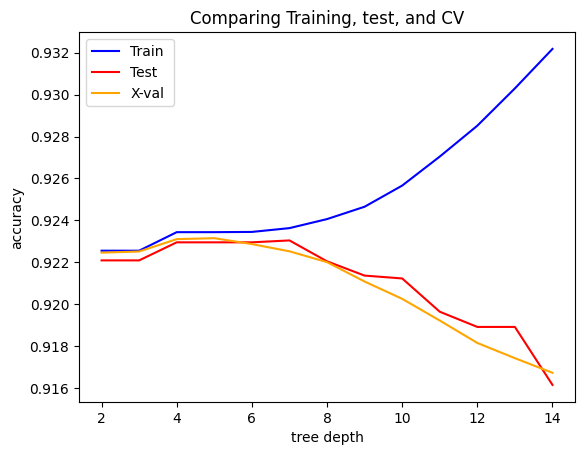

In [ ]:
# Define the x-axis values
x = depths

# Assume list1 and list2 are your data lists of size 20

# Plot both lists
plt.plot(x, train_acc, label='Train ', color='blue')  # Plot list1 in blue
plt.plot(x, test_acc, label='Test', color='red')   # Plot list2 in red
plt.plot(x, cv_acc, label='X-val', color='orange')   # Plot list2 in red

# Adding labels and title
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.title('Comparing Training, test, and CV')
plt.legend()  # Show legend

# Display the plot
plt.show()

**17.  Fit the tree model (again) using the optimal depth.  Create the 2x2 confusion matrix using the predictions on the test set, vs the true values of the test set (Y_test).**

In [ ]:
opt_depth = 5
best_model = DecisionTreeClassifier(max_depth=opt_depth, criterion="entropy")
best_model.fit(X_train, y_train)

predvec=best_model.predict(X_test)

pd.crosstab(predvec,y_test,rownames=["pred"],normalize=True).round(3)


No-show,0,1
pred,,
0,0.736,0.014
1,0.063,0.187


**18. Use the functions `precision_score` and `recall_score` to calculate precision and recall - these numbers should correspond to the appropriate calculations from the 2x2 table.**

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, predvec, pos_label=1, average='binary')
print("precision = ", precision.round(3))

precision =  0.748


In [ ]:
recall = recall_score(y_test, predvec, pos_label=1, average='binary')
recall.round(3)
print("recall = ", recall.round(3))

recall =  0.93


**18b.(Extra Credit - 2 points) The precision and recall above were calculated using a threshold of 0.5 (that is, any case with a probability over 0.5 is predicted as No-show).  As we discussed in class, changing the threshold will have an effect on precision and recall.  Change the threshold of labelling a No-show to 0.9 and re-calcuate precision and recall.  (you will need to generate a new 2x2 table and calculate P&R from the values in the table). Interpret the change in P&R between the two thresholds.**

In [ ]:
probvec=best_model.predict_proba(X_test)
pred_1 = probvec[:, 1]
threshold=0.9
probvec_01 = np.where(pred_1 >= threshold, 1, 0)
probvec_01.mean()

pd.crosstab(probvec_01,y_test,rownames=["pred"],normalize=True).round(3)

precision = precision_score(y_test, probvec_01, pos_label=1, average='binary')

recall = recall_score(y_test, probvec_01, pos_label=1, average='binary')

print("precision = ", precision.round(3),"recall = ", recall.round(3))

precision =  0.935 recall =  0.142
